# Author: Ashwini T

# The Spark Foundation- Data Science and Business Analysis Intern

# Task 1: Prediction using Supervised ML (Simple Linear Regression)

In this regression task, we are going to predict the percentage of scores of students based upon number of study hours

In [ ]:
This is a simple linear regression task, as it involves just two variables

# Importing the Dataset

In [3]:
#importing the libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#import the dataset from the url
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("data imported successfully")

data imported successfully


In [9]:
#Display first five rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
#Display last five rows of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset

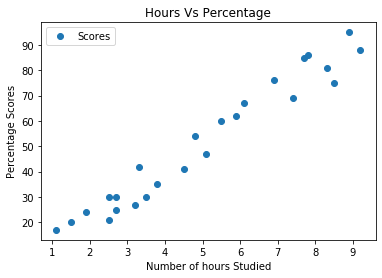

In [9]:
#Plotting the distribution of scores
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs Percentage")
plt.xlabel("Number of hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

From the above graph we can observe that the there is a positive linear regression between number of hours studied and percentage of scores.

# Preparing the data

In [ ]:
Now, the next step is to divide the data into "attributes"(inputs) and "labels"(outputs)

In [13]:
X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

Further, we can split this data in training and testing datasets. We will do this by Scikit-Learn's built in train_test_split() method.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the algorithm

Now its time to train our algorithm

In [17]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)
print("Training completed")

Training completed


In [40]:
# Plotting the regression Line
line= regressor.coef_*X+regressor.intercept_

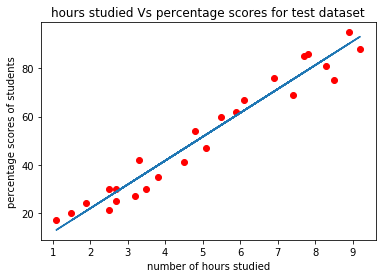

In [37]:
#Plotting for test dataset
plt.scatter(X,y,color="red")
plt.plot(X, line);
plt.title("hours studied Vs percentage scores for test dataset")
plt.xlabel("number of hours studied")
plt.ylabel("percentage scores of students")
plt.show()

# Making predictions

In [ ]:
Now, we have trained our algorithm,its time to make some predictions

In [20]:
print(X_test) #Testing data - In Hours
y_pred=regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#Comparing actual Vs predicted
df1=pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now we can calculate for students who studied for 9.25 hours per day

In [31]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of hours = {}".format(hours))
print("The Predicted scores = {} ".format(own_pred[0]))

Number of hours = 9.25
The Predicted scores = 93.69173248737538 


Hence the predicted scores of students who studied 9.25 hours/day is 93.69173248737538

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics
print("Mean Absolute Error:",
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
